In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

### Task_1, Task_2:

* 1.	Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .
* 2.	Оцените ошибку модели из п.2 .

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'covid_19_data.csv',
 'lesson_2_tasks.ipynb',
 'my_BRENT2019.csv',
 'my_PJME_MW.csv',
 'Анализ COVID 19.ipynb',
 'Временные ряды 2.html',
 'Временные ряды 2.ipynb',
 'Временные ряды2.pptx',
 'Стационарный ряд.rtf']

In [3]:
data_path = 'my_PJME_MW.csv'
df = pd.read_csv(data_path, sep=',')

df.head()

,Date,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
0,2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
1,2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2,2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
3,2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
4,2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


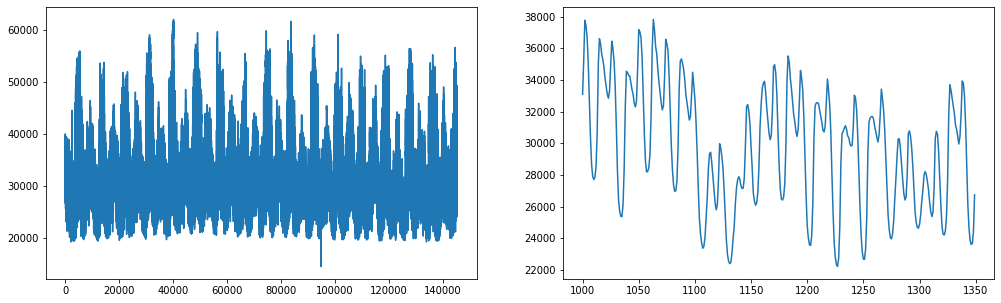

In [4]:
plt.subplots(1,2, figsize=(17,5))

plt.subplot(1, 2, 1)
plt.plot(df['PJME_MW'])

plt.subplot(1, 2, 2)
plt.plot(df['PJME_MW'][1000:1350])

In [5]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [6]:
df.head()

,Date,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
0,2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
1,2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2,2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
3,2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
4,2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [7]:
df['value'] = df['PJME_MW']
df.drop(columns='PJME_MW', inplace=True)

# добавили историю на глубину 3 измерения от текущего (р=3)
df['value1'] = df['value'].shift(1)
df['value2'] = df['value'].shift(2)
df['value3'] = df['value'].shift(3)

# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df['value'], 0.01)
df['exp_0_03'] = exponential_smoothing(df['value'], 0.03)
df['exp_0_08'] = exponential_smoothing(df['value'], 0.08)

# # добавим разности - 1-й порядок
df['diff1'] = df['value'].diff(1)

df['season_dif'] = df['value'] - df['exp_0_01']

df.drop(columns='Time', inplace=True)

df = df.fillna(0)

df.head()

,Date,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,...,is_next_holiday,value,value1,value2,value3,exp_0_01,exp_0_03,exp_0_08,diff1,season_dif
0,2002-01-01,2002,1,1,1,1,1,1,1,1,...,0,30393.0,0.0,0.0,0.0,30393.000000,30393.000000,30393.000000,0.0,0.000000
1,2002-01-01,2002,1,1,1,1,1,1,2,1,...,0,29265.0,30393.0,0.0,0.0,30381.720000,30359.160000,30302.760000,-1128.0,-1116.720000
2,2002-01-01,2002,1,1,1,1,1,1,3,1,...,0,28357.0,29265.0,30393.0,0.0,30361.472800,30299.095200,30147.099200,-908.0,-2004.472800
3,2002-01-01,2002,1,1,1,1,1,1,4,1,...,0,27899.0,28357.0,29265.0,30393.0,30336.848072,30227.092344,29967.251264,-458.0,-2437.848072
4,2002-01-01,2002,1,1,1,1,1,1,5,1,...,0,28057.0,27899.0,28357.0,29265.0,30314.049591,30161.989574,29814.431163,158.0,-2257.049591


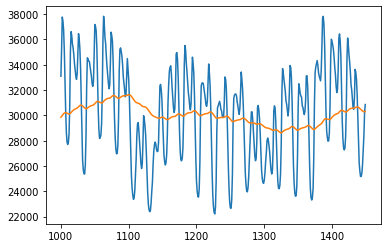

In [8]:
plt.plot(df['value'][1000:1450])
plt.plot(df['exp_0_01'][1000:1450])

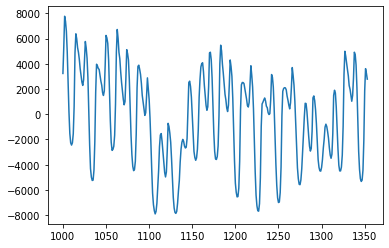

In [9]:
plt.plot(df['season_dif'][1000:1354])

##### Обучение модели:

In [10]:
df['Date'] = df['Date'].apply(lambda param: datetime(int(param.split('-')[0]),
                                                     int(param.split('-')[1]),
                                                     int(param.split('-')[2])))

df.index = df['Date']
df.drop(columns='Date', inplace=True)


# сделаем примеры и модель 
def split_data_b(data, split_date):
    return data.loc[data.index <= split_date].copy(), data.loc[data.index > split_date].copy()


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



def learn_evaluate(h):
    train_b, test_b = split_data_b( df, datetime(2016, 10, 10))

    train_b['target'] = train_b['value'].shift(-h)
    test_b['target'] = test_b['value'].shift(-h)
    
    train_b = train_b.loc[train_b['target'].notna(), :]
    test_b = test_b.loc[test_b['target'].notna(), :]
    
    train_b = train_b.fillna(0)
    test_b = test_b.fillna(0)

    y_train_b = train_b['target']
    columns = list(train_b.columns)
    columns.remove('target')
    X_train_b = train_b[columns]

    y_test_b = test_b['target']
    columns = list(test_b.columns)
    columns.remove('target')
    X_test_b = test_b[columns]

    model_gb = GradientBoostingRegressor(max_depth=5, random_state=17, n_estimators=10)
    model_gb.fit( X_train_b, y_train_b ) 

    X_test_pred_gb = model_gb.predict(X_test_b)

    er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)
    return er_g

print(round(learn_evaluate(h=1), 2))
print(round(learn_evaluate(h=10), 2))

6.39
9.21


### Task_3:

3.	Сделайте вывод о том, как изменилась ошибка модели по значениям h.

Ошибка с ростом горизонта прогнозирования закономерно растет, в то же время рост не линеен, горизонт увеличили в 10 раз, ошибка не выросла и в 2 раза. Все-тики извлекать закономерности из данных модели гораздо легче, чем из ряда цен на нефть. Здесь вполне прозрачные закономерности, вычисляемый даже глазами за разумный период времени.

### Task_4:

4.	Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):
 а) Изменение температуры за окном :).
 б) Количество денег, которые тратят покупатели в интернет магазине.
 в) Вес растущего котенка.
 г) Прирост объема деревьев в лесу от времени

##### Ответ:

- а) Не стационарный, ярко выраженная сезонность, легкая трендовость (а-ля тренд на глобальное потепление или тренд на возвращение ледникового периода если смотреть ещё долгосрочней) + цикличность разного рода - в т.ч. ярко выраженная с периодом в сутки.

- б) Не сационарный, присутствует сезонность - выраженность зависит от типа товара - новогодние елки - очень выраженная, продукты в супер-маркетах - менее, трендовость присутствует, зависит от многих групп факторов - в т.ч. внешние, проявляется в общем тренде отрасли и внутренние - например, плохое обслуживание может постепенно приводить к оттоку покупателей, цикличность с периодом сутки как минимум тоже присутствует в любом интернет магазине, ну и с периодом неделя тоже будет и т.д.

- в) Не стационарный, ярко выраженная трендовость, слабо выраженная, но тем не менее, вероятно имеющая место сезонность, цикличность с периодом в сутки - зависимость от приемов пищи и т.д.

- г) Прирост, возможно, гораздо ближе к стационарности, чем какой-либо из перечисленных временных рядов, но тоже далеко не факт. Тут надо изучать биологию, но если смотреть прирост объема начиная с ранних лет жизни дерева, то подозреваю, будет присутствовать трендовость, т.е. прирост в %, вероятно, будет не трендовым, а в абсалютных значениях, вероятно, трендовым, чем больше дерево, тем оно больше прирастает (вероятно), сезонность - вероятно должна присутствовать. Получается, тоже не особо стационарный ряд, но ближе к стационарным его делает то, что в отличие от остальных - это не абсолютное значение величины, а приращение величины.